In [1]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


<Axes: >

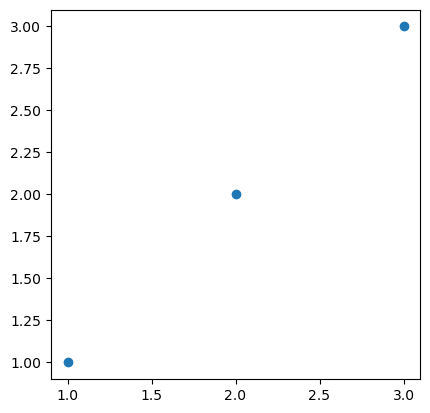

In [2]:
# Create a GeoSeries of points
points = gpd.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])

# Visualize the points
points.plot()

<Axes: >

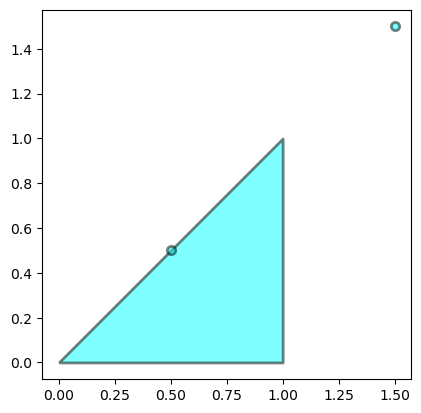

In [3]:
# Define some points and a polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
points = [Point(0.5, 0.5), Point(1.5, 1.5)]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'geometry': points + [polygon]})

# Plot the GeoDataFrame
gdf.plot(alpha=0.5, linewidth=2, edgecolor='k', color='cyan')

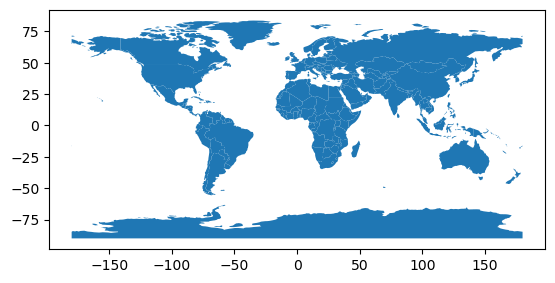

In [4]:
# Load a sample geospatial dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
world.plot()
plt.show()

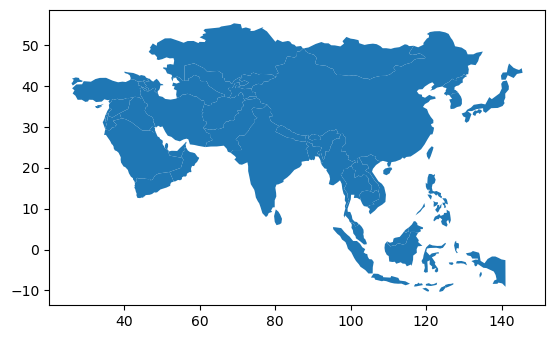

In [5]:
# Filter the GeoDataFrame for countries in North America
asia = world[world['continent'] == 'Asia']

# Plot the filtered GeoDataFrame
asia.plot()
plt.show()

In [6]:
# Calculate the area of each country
world['area'] = world.geometry.area

# Perform a buffer operation on a geometry
buffered_point = asia.geometry.buffer(1)
buffered_point

5      POLYGON ((45.77670 49.13895, 45.76543 49.19023...
6      POLYGON ((55.98031 40.30872, 55.88215 40.31235...
8      MULTIPOLYGON (((127.19349 2.84843, 127.26353 2...
24     POLYGON ((124.07925 -9.34986, 124.04039 -9.264...
76     POLYGON ((33.33148 30.86198, 33.33143 30.86209...
77     POLYGON ((35.13633 35.14949, 35.16966 35.20454...
79     POLYGON ((33.98095 31.76189, 33.97813 31.78314...
83     POLYGON ((34.54567 32.39467, 34.55082 32.49536...
84     POLYGON ((50.59288 24.08258, 50.58168 24.17976...
85     POLYGON ((50.26141 23.91872, 50.18075 23.97763...
86     POLYGON ((48.09748 30.96823, 48.19652 30.95087...
87     POLYGON ((38.97596 31.18540, 38.87683 31.21313...
88     POLYGON ((54.36876 22.16509, 54.32273 22.24390...
90     POLYGON ((101.68681 11.74685, 101.65192 11.826...
91     POLYGON ((98.62331 6.83671, 98.56157 6.81944, ...
92     POLYGON ((100.06887 18.66520, 100.06629 18.666...
93     POLYGON ((91.69997 22.27197, 91.72569 22.36237...
94     POLYGON ((103.04117 19.7

In [7]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.21212 -22.90731)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.21255 -33.87137)
241,Singapore,POINT (103.85387 1.29498)


In [8]:
# Perform a spatial join between cities and countries
cities_with_country = gpd.sjoin(cities, world, op='within')
# Inspect the result
cities_with_country.head()

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est,area
0,Vatican City,POINT (12.45339 41.90328),141,60297396.0,Europe,Italy,ITA,2003576,34.685652
1,San Marino,POINT (12.44177 43.93610),141,60297396.0,Europe,Italy,ITA,2003576,34.685652
226,Rome,POINT (12.48131 41.89790),141,60297396.0,Europe,Italy,ITA,2003576,34.685652
2,Vaduz,POINT (9.51667 47.13372),114,8877067.0,Europe,Austria,AUT,445075,10.179604
212,Vienna,POINT (16.36469 48.20196),114,8877067.0,Europe,Austria,AUT,445075,10.179604
